# install datasets

In [1]:
pip install datasets

# Tải bộ dữ liệu UIT-VSMEC từ datasets

## Tải bộ dữ liệu

In [2]:
import pandas as pd

In [3]:
from datasets import load_dataset

dataset = load_dataset("ura-hcmut/UIT-VSMEC")
print(dataset)

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


DatasetDict({
    train: Dataset({
        features: ['Emotion', 'Sentence'],
        num_rows: 5548
    })
    validation: Dataset({
        features: ['Emotion', 'Sentence'],
        num_rows: 686
    })
    test: Dataset({
        features: ['Emotion', 'Sentence'],
        num_rows: 693
    })
})


In [4]:
# Chuyển thành 3 bảng 
train_df = pd.DataFrame(dataset["train"])
valid_df = pd.DataFrame(dataset["validation"])
test_df  = pd.DataFrame(dataset["test"])

In [5]:
train_df['Emotion'].value_counts()

Emotion
Enjoyment    1558
Disgust      1071
Other        1021
Sadness       947
Anger         391
Fear          318
Surprise      242
Name: count, dtype: int64

In [6]:
valid_df['Emotion'].value_counts()

Emotion
Enjoyment    214
Other        141
Disgust      135
Sadness       86
Anger         49
Fear          31
Surprise      30
Name: count, dtype: int64

In [7]:
test_df['Emotion'].value_counts()

Emotion
Enjoyment    193
Disgust      132
Other        129
Sadness      116
Fear          46
Anger         40
Surprise      37
Name: count, dtype: int64

In [8]:
train_df.head()

,Emotion,Sentence
0,Other,cho mình xin bài nhạc tên là gì với ạ
1,Disgust,cho đáng đời con quỷ . về nhà lôi con nhà mày ...
2,Disgust,lo học đi . yêu đương lol gì hay lại thích học...
3,Enjoyment,uớc gì sau này về già vẫn có thể như cụ này :))
4,Enjoyment,mỗi lần có video của con là cứ coi đi coi lại ...


In [9]:
# Đổi lại vị trí 2 cột 
for df in [train_df, valid_df, test_df]:
    if "Emotion" in df.columns:
        col_emotion = df.pop("Emotion")  
        df["Emotion"] = col_emotion      


In [10]:
train_df.head(3)

,Sentence,Emotion
0,cho mình xin bài nhạc tên là gì với ạ,Other
1,cho đáng đời con quỷ . về nhà lôi con nhà mày ...,Disgust
2,lo học đi . yêu đương lol gì hay lại thích học...,Disgust


## Lưu lại bộ dữ liệu để sử dụng

In [11]:
path = '..\\data\\UIT_VSMEC'

# Tự động ghi đè nếu file đã tồn tại trước đó
train_df.to_csv(f"{path}\\vsmec_train.csv", index=False, encoding="utf-8-sig")
valid_df.to_csv(f"{path}\\vsmec_valid.csv", index=False, encoding="utf-8-sig")
test_df.to_csv(f"{path}\\vsmec_test.csv",  index=False, encoding="utf-8-sig")

## Gộp 3 tập train - valid - test thành 1 bộ

In [12]:
merged_df = pd.concat([train_df, valid_df, test_df], ignore_index=True)
merged_df.shape

(6927, 2)

In [13]:
merged_df['Emotion'].value_counts()

Emotion
Enjoyment    1965
Disgust      1338
Other        1291
Sadness      1149
Anger         480
Fear          395
Surprise      309
Name: count, dtype: int64

In [14]:
# Tỷ lệ các nhãn trong bộ dữ liệu UIT-VSMEC, làm tròn đến 2 chữ số thập phân sau dấu phẩu
merged_df['Emotion'].value_counts(normalize=True).round(4) * 100

Emotion
Enjoyment    28.37
Disgust      19.32
Other        18.64
Sadness      16.59
Anger         6.93
Fear          5.70
Surprise      4.46
Name: proportion, dtype: float64

**Lưu lại bộ dữ liệu để sử dụng**

In [15]:
merged_df.to_csv(f"{path}\\vsmec_merged.csv", index=False, encoding="utf-8-sig")

## Gộp 2 tập train - valid thành 1 bộ, tập test để test

In [27]:
merged_df_train_valid = pd.concat([train_df, valid_df], ignore_index=True)
merged_df_train_valid.shape

(6234, 2)

In [50]:
uit_train_valid_counts = merged_df_train_valid['Emotion'].value_counts()
uit_train_valid_counts

Emotion
Enjoyment    1772
Disgust      1206
Other        1162
Sadness      1033
Anger         440
Fear          349
Surprise      272
Name: count, dtype: int64

In [49]:
# Tỷ lệ các nhãn trong bộ dữ liệu UIT-VSMEC, làm tròn đến 2 chữ số thập phân sau dấu phẩu
uit_train_valid_counts_ratio = merged_df_train_valid['Emotion'].value_counts(normalize=True).round(4) * 100
uit_train_valid_counts_ratio

Emotion
Enjoyment    28.42
Disgust      19.35
Other        18.64
Sadness      16.57
Anger         7.06
Fear          5.60
Surprise      4.36
Name: proportion, dtype: float64

**Lưu lại bộ dữ liệu để sử dụng**

In [30]:
merged_df_train_valid.to_csv(f"{path}\\vsmec_merged_train_valid.csv", index=False, encoding="utf-8-sig")

# Gộp bộ dữ liệu UIT-VSMEC và bộ dữ liệu tự label

## Lấy data từ bộ dữ liệu tự label

In [32]:
hus_final_df = pd.read_csv("..\\data\\hus_fb.csv", encoding="utf-8-sig")

hus_final_df.shape

(4616, 2)

In [33]:
hus_final_df.head(3)

,Sentence,Emotion
0,xin lỗi chứ loại này tôi đéo bao giờ chơi lần ...,Disgust
1,đã sợ bị đánh thì đừng có nói :)),Anger
2,đã sợ đừng có nói:)) bản lĩnh cái thằng đàn ôn...,Anger


In [44]:
hus_counts = hus_final_df['Emotion'].value_counts()
hus_counts

Emotion
Enjoyment    1812
Other         865
Disgust       619
Sadness       463
Anger         429
Surprise      304
Fear          124
Name: count, dtype: int64

In [48]:
# Tỷ lệ các nhãn trong bộ dữ liệu tự gán nhãn, làm tròn đến 2 chữ số thập phân sau dấu phẩu
hus_counts_ratio = hus_final_df['Emotion'].value_counts(normalize=True).round(4) * 100
hus_counts_ratio

Emotion
Enjoyment    39.25
Other        18.74
Disgust      13.41
Sadness      10.03
Anger         9.29
Surprise      6.59
Fear          2.69
Name: proportion, dtype: float64

## Gộp 2 bộ dữ liệu
**Bộ dữ liệu sử dụng để gộp:**
- UIT: train - valid
- Bộ dữ liệu nhóm tự gán nhãn

**Phương thức:**
- Nhãn hiếm: Giữ lại toàn bộ từ cả 2 bộ
- Nhãn phổ biến: Lấy mẫu theo tỷ lệ để cân bằng phân phối

In [38]:
import numpy as np

In [51]:
# Số lượng mỗi nhãn từ cả 2 bộ dữ liệu
print("UIT-VSMEC counts:\n", uit_train_valid_counts)
print("\nHUS_FB counts:\n", hus_counts)

UIT-VSMEC counts:
 Emotion
Enjoyment    1772
Disgust      1206
Other        1162
Sadness      1033
Anger         440
Fear          349
Surprise      272
Name: count, dtype: int64

HUS_FB counts:
 Emotion
Enjoyment    1812
Other         865
Disgust       619
Sadness       463
Anger         429
Surprise      304
Fear          124
Name: count, dtype: int64


In [52]:
# Tỉ lệ mỗi nhãn từ cả 2 bộ dữ liệu
print("UIT-VSMEC counts ratio (%):\n", uit_train_valid_counts_ratio)
print("\nHUS_FB counts ratio (%):\n", hus_counts_ratio)

UIT-VSMEC counts ratio (%):
 Emotion
Enjoyment    28.42
Disgust      19.35
Other        18.64
Sadness      16.57
Anger         7.06
Fear          5.60
Surprise      4.36
Name: proportion, dtype: float64

HUS_FB counts ratio (%):
 Emotion
Enjoyment    39.25
Other        18.74
Disgust      13.41
Sadness      10.03
Anger         9.29
Surprise      6.59
Fear          2.69
Name: proportion, dtype: float64


In [54]:
# Tính tổng số lượng mỗi nhãn khi gộp đơn thuần
total_counts = {}
for emotion in set(merged_df_train_valid['Emotion'].unique()) | set(hus_final_df['Emotion'].unique()):
    uit_count = uit_train_valid_counts.get(emotion, 0)
    hus_count = hus_counts.get(emotion, 0)
    total_counts[emotion] = uit_count + hus_count

print("Tổng số lượng mỗi nhãn nếu gộp đơn thuần:")
for emotion, count in sorted(total_counts.items(), key=lambda x: x[1], reverse=True):
    print(f"{emotion}: {count}")

Tổng số lượng mỗi nhãn nếu gộp đơn thuần:
Enjoyment: 3584
Other: 2027
Disgust: 1825
Sadness: 1496
Anger: 869
Surprise: 576
Fear: 473


In [55]:
# Xác định ngưỡng để phân loại nhãn hiếm vs phổ biến
# Sử dụng median của số lượng các nhãn làm ngưỡng
threshold = np.median(list(total_counts.values()))
print("Ngưỡng phân loại- median:", threshold)

Ngưỡng phân loại- median: 1496.0


In [79]:
# --- 0. BƯỚC TIỀN XỬ LÝ: LỌC THEO ĐỘ DÀI ---

# Hàm tính độ dài (số từ)
def count_words(text):
    return len(str(text).split())

# 1. Thống kê độ dài trên tập chuẩn UIT
# Tạo cột độ dài tạm thời
merged_df_train_valid['word_count'] = merged_df_train_valid['Sentence'].apply(count_words)

# Tính ngưỡng (ví dụ: lấy khoảng tin cậy 95% hoặc dùng quantile)
min_len = 3 # Ngưỡng cứng: Ít nhất 3 từ để có ngữ cảnh
# Lấy độ dài mà 95% dữ liệu UIT nằm trong đó (để loại bỏ các câu quá dài bất thường)
max_len_limit = merged_df_train_valid['word_count'].quantile(0.99) 

print(f"Thống kê độ dài UIT: Min={merged_df_train_valid['word_count'].min()}, Max={merged_df_train_valid['word_count'].max()}")
print(f"=> Ngưỡng lọc áp dụng cho HUS: {min_len} <= số_từ <= {int(max_len_limit)}")

# 2. Lọc dữ liệu HUS trước khi gộp
hus_final_df['word_count'] = hus_final_df['Sentence'].apply(count_words)

initial_hus_count = len(hus_final_df)

# Lọc: Giữ lại các câu nằm trong khoảng cho phép
hus_filtered = hus_final_df[
    (hus_final_df['word_count'] >= min_len) & 
    (hus_final_df['word_count'] <= max_len_limit)
].copy()

# Cập nhật lại biến hus_final_df để dùng cho đoạn code gộp phía sau
hus_final_df = hus_filtered

print(f"Đã lọc HUS: {initial_hus_count} -> {len(hus_final_df)} dòng (Loại bỏ {initial_hus_count - len(hus_final_df)} dòng nhiễu độ dài)")

# ... Sau đó chạy tiếp đoạn code gộp theo nhóm nhãn ở câu trả lời trước ...

Thống kê độ dài UIT: Min=1, Max=164
=> Ngưỡng lọc áp dụng cho HUS: 3 <= số_từ <= 49
Đã lọc HUS: 4616 -> 4306 dòng (Loại bỏ 310 dòng nhiễu độ dài)


In [80]:
import pandas as pd
import numpy as np

# Giả định dữ liệu đầu vào:
# merged_df_train_valid: Dữ liệu chuẩn UIT
# hus_final_df: Dữ liệu gán nhãn từ HUS

# --- 1. CẤU HÌNH CHIẾN LƯỢC GỘP ---

# Định nghĩa các nhóm nhãn
GROUP_RARE = ['Anger', 'Fear', 'Surprise']      # Nhóm hiếm: Cần lấy tối đa
GROUP_MEDIUM = ['Sadness', 'Other', 'Disgust']  # Nhóm trung bình: Lấy vừa phải
GROUP_COMMON = ['Enjoyment']                    # Nhóm phổ biến: Lấy ít để tránh nhiễu

# Tỷ lệ lấy mẫu từ HUS (Bạn có thể chỉnh sửa con số này)
# 1.0 nghĩa là lấy 100%, 0.3 nghĩa là lấy 30%
RATIO_RARE   = 1.0  # Lấy hết 100% dữ liệu HUS cho các nhãn hiếm
RATIO_MEDIUM = 0.5  # Lấy 50% dữ liệu HUS cho nhãn trung bình (tùy chỉnh lại nếu thấy quá nhiều/ít)
RATIO_COMMON = 0.1  # Chỉ lấy 10% dữ liệu HUS cho Enjoyment

# --- 2. TIẾN HÀNH LẤY MẪU VÀ GỘP ---

merged_samples = []
all_emotions = merged_df_train_valid['Emotion'].unique()

print(f"{'Label':<12} | {'UIT (Gốc)':<10} | {'HUS (Tổng)':<10} | {'HUS (Lấy)':<10} | {'Tổng sau gộp':<12} | {'Ghi chú'}")
print("-" * 85)

for emotion in all_emotions:
    # Lấy dữ liệu nguồn
    uit_data = merged_df_train_valid[merged_df_train_valid['Emotion'] == emotion].copy()
    hus_data = hus_final_df[hus_final_df['Emotion'] == emotion].copy()
    
    # Mặc định luôn lấy 100% UIT
    merged_samples.append(uit_data)
    
    # Xử lý lấy dữ liệu từ HUS theo nhóm
    hus_sampled = pd.DataFrame()
    note = ""
    
    if emotion in GROUP_RARE:
        # Nhóm Hiếm: Lấy toàn bộ
        hus_sampled = hus_data.copy() # Lấy 100%
        note = f"Rare -> Lấy 100% ({RATIO_RARE*100}%)"
        
    elif emotion in GROUP_MEDIUM:
        # Nhóm Trung bình: Lấy theo tỷ lệ vừa phải
        if not hus_data.empty:
            hus_sampled = hus_data.sample(frac=RATIO_MEDIUM, random_state=42)
        note = f"Medium -> Lấy {RATIO_MEDIUM*100}%"
        
    elif emotion in GROUP_COMMON:
        # Nhóm Phổ biến: Chỉ lấy một chút ngẫu nhiên
        if not hus_data.empty:
            hus_sampled = hus_data.sample(frac=RATIO_COMMON, random_state=42)
        note = f"Common -> Lấy {RATIO_COMMON*100}%"
    
    # Gộp phần HUS đã chọn vào list
    if not hus_sampled.empty:
        merged_samples.append(hus_sampled)
        
    # In thống kê chi tiết
    print(f"{emotion:<12} | {len(uit_data):<10} | {len(hus_data):<10} | {len(hus_sampled):<10} | {len(uit_data) + len(hus_sampled):<12} | {note}")

# --- 3. TẠO DATAFRAME CUỐI CÙNG ---
merged_final = pd.concat(merged_samples, ignore_index=True)

# Shuffle (xáo trộn) dữ liệu để đảm bảo tính ngẫu nhiên khi train
merged_final = merged_final.sample(frac=1, random_state=42).reset_index(drop=True)

print("-" * 85)
print(f"Tổng kích thước bộ dữ liệu mới: {len(merged_final)} dòng")

# Kiểm tra phân bố mới
print("\nPhân bố tỷ lệ (%) sau khi gộp:")
print(merged_final['Emotion'].value_counts(normalize=True).apply(lambda x: f"{x:.2%}"))

Label        | UIT (Gốc)  | HUS (Tổng) | HUS (Lấy)  | Tổng sau gộp | Ghi chú
-------------------------------------------------------------------------------------
Other        | 1162       | 809        | 404        | 1566         | Medium -> Lấy 50.0%
Disgust      | 1206       | 593        | 296        | 1502         | Medium -> Lấy 50.0%
Enjoyment    | 1772       | 1692       | 169        | 1941         | Common -> Lấy 10.0%
Anger        | 440        | 392        | 392        | 832          | Rare -> Lấy 100% (100.0%)
Surprise     | 272        | 264        | 264        | 536          | Rare -> Lấy 100% (100.0%)
Sadness      | 1033       | 440        | 220        | 1253         | Medium -> Lấy 50.0%
Fear         | 349        | 116        | 116        | 465          | Rare -> Lấy 100% (100.0%)
-------------------------------------------------------------------------------------
Tổng kích thước bộ dữ liệu mới: 8095 dòng

Phân bố tỷ lệ (%) sau khi gộp:
Emotion
Enjoyment    23.98%
Other   

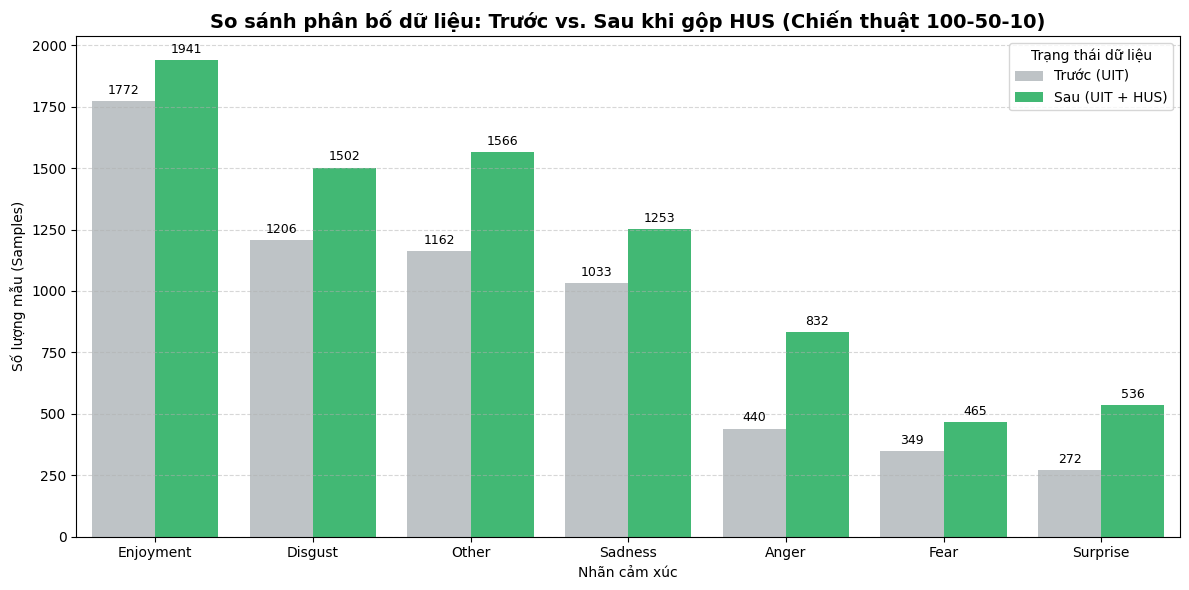


=== BẢNG THỐNG KÊ CHI TIẾT ===
  Emotion  Trước (UIT)  Sau (UIT + HUS)  % Tăng
Enjoyment         1772             1941     9.5
  Disgust         1206             1502    24.5
    Other         1162             1566    34.8
  Sadness         1033             1253    21.3
    Anger          440              832    89.1
     Fear          349              465    33.2
 Surprise          272              536    97.1

=== HIỆU QUẢ CÂN BẰNG DỮ LIỆU (IMBALANCE RATIO) ===
Trước gộp (UIT Only): 1 mẫu Max (Enjoyment) 'cân' 6.5 mẫu Min.
Sau gộp (Mixed):      1 mẫu Max (Enjoyment) 'cân' 4.2 mẫu Min.
=> CẢI THIỆN: Độ lệch dữ liệu giảm 35.9%


In [81]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# --- 1. CHUẨN BỊ DỮ LIỆU SO SÁNH ---
# Đếm số lượng từ tập gốc (UIT)
dist_before = merged_df_train_valid['Emotion'].value_counts().sort_index()
# Đếm số lượng từ tập sau khi gộp (UIT + HUS strategy)
dist_after = merged_final['Emotion'].value_counts().sort_index()

# Tạo DataFrame tổng hợp để vẽ
comparison_df = pd.DataFrame({
    'Emotion': dist_before.index,
    'Trước (UIT)': dist_before.values,
    'Sau (UIT + HUS)': dist_after.values
})

# Tính thêm cột thay đổi (%)
comparison_df['Tăng trưởng'] = comparison_df['Sau (UIT + HUS)'] - comparison_df['Trước (UIT)']
comparison_df['% Tăng'] = (comparison_df['Tăng trưởng'] / comparison_df['Trước (UIT)'] * 100).round(1)

# Sắp xếp lại theo thứ tự số lượng giảm dần của tập gốc để dễ nhìn
comparison_df = comparison_df.sort_values(by='Trước (UIT)', ascending=False)

# --- 2. VẼ BIỂU ĐỒ ---
plt.figure(figsize=(12, 6))

# Chuyển dữ liệu sang dạng 'long' để dùng Seaborn
df_melted = comparison_df.melt(id_vars='Emotion', 
                               value_vars=['Trước (UIT)', 'Sau (UIT + HUS)'], 
                               var_name='Giai đoạn', 
                               value_name='Số lượng mẫu')

# Vẽ biểu đồ cột nhóm (Grouped Bar Chart)
ax = sns.barplot(data=df_melted, x='Emotion', y='Số lượng mẫu', hue='Giai đoạn', palette=['#bdc3c7', '#2ecc71'])

# Thêm nhãn số lượng trên đầu mỗi cột
for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=9)

plt.title('So sánh phân bố dữ liệu: Trước vs. Sau khi gộp HUS (Chiến thuật 100-50-10)', fontsize=14, fontweight='bold')
plt.ylabel('Số lượng mẫu (Samples)')
plt.xlabel('Nhãn cảm xúc')
plt.legend(title='Trạng thái dữ liệu')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# --- 3. IN BÁO CÁO CHỈ SỐ MẤT CÂN BẰNG ---
print("\n=== BẢNG THỐNG KÊ CHI TIẾT ===")
print(comparison_df[['Emotion', 'Trước (UIT)', 'Sau (UIT + HUS)', '% Tăng']].to_string(index=False))

# Tính Imbalance Ratio (Tỷ lệ: Class lớn nhất / Class nhỏ nhất)
# Số càng nhỏ càng tốt (1.0 là cân bằng tuyệt đối)
max_before = dist_before.max()
min_before = dist_before.min()
ratio_before = max_before / min_before

max_after = dist_after.max()
min_after = dist_after.min()
ratio_after = max_after / min_after

print("\n=== HIỆU QUẢ CÂN BẰNG DỮ LIỆU (IMBALANCE RATIO) ===")
print(f"Trước gộp (UIT Only): 1 mẫu Max (Enjoyment) 'cân' {ratio_before:.1f} mẫu Min.")
print(f"Sau gộp (Mixed):      1 mẫu Max (Enjoyment) 'cân' {ratio_after:.1f} mẫu Min.")
print(f"=> CẢI THIỆN: Độ lệch dữ liệu giảm {((ratio_before - ratio_after)/ratio_before)*100:.1f}%")

In [62]:
# So sánh phân bố trước và sau
print("=== SO SÁNH PHÂN BỐ ===")
print("\n1. Phân bố UIT-VSMEC gốc:")
print(merged_df['Emotion'].value_counts(normalize=True).round(4) * 100)

print("\n2. Phân bố HUSFBcGp gốc:")
print(hus_final_df['Emotion'].value_counts(normalize=True).round(4) * 100)

print("\n3. Phân bố sau khi gộp có chọn lọc:")
print(merged_final['Emotion'].value_counts(normalize=True).round(4) * 100)

print("\n4. Số lượng chi tiết:")
merged_final['Emotion'].value_counts()

=== SO SÁNH PHÂN BỐ ===

1. Phân bố UIT-VSMEC gốc:
Emotion
Enjoyment    28.37
Disgust      19.32
Other        18.64
Sadness      16.59
Anger         6.93
Fear          5.70
Surprise      4.46
Name: proportion, dtype: float64

2. Phân bố HUSFBcGp gốc:
Emotion
Enjoyment    39.25
Other        18.74
Disgust      13.41
Sadness      10.03
Anger         9.29
Surprise      6.59
Fear          2.69
Name: proportion, dtype: float64

3. Phân bố sau khi gộp có chọn lọc:
Emotion
Enjoyment    28.43
Disgust      19.35
Other        18.64
Sadness      16.57
Anger         7.06
Fear          5.59
Surprise      4.36
Name: proportion, dtype: float64

4. Số lượng chi tiết:


Emotion
Enjoyment    2401
Disgust      1634
Other        1574
Sadness      1399
Anger         596
Fear          472
Surprise      368
Name: count, dtype: int64

In [ ]:
# Thống kê tổng hợp
print("=== THỐNG KÊ TỔNG HỢP ===")
print(f"\nTổng số mẫu ban đầu (nếu gộp đơn thuần): {len(merged_df) + len(hus_final_df)}")
print(f"Tổng số mẫu sau khi gộp có chọn lọc: {len(merged_final)}")
print(f"Tỷ lệ giữ lại: {len(merged_final) / (len(merged_df) + len(hus_final_df)) * 100:.2f}%")

print("\nPhân bố nhãn (tỷ lệ %):")
print(merged_final['Emotion'].value_counts(normalize=True).round(4) * 100)

Emotion
Enjoyment    32.72
Other        18.68
Disgust      16.95
Sadness      13.97
Anger         7.87
Surprise      5.31
Fear          4.50
Name: proportion, dtype: float64

In [23]:
merged_final.to_csv("..\\data\\raw_data_final.csv", index=False, encoding="utf-8-sig")